# Homework 1: Building a Duration Prediction Model

##### Abraham Alvarado Padilla

In [14]:
#First we import the relevant libraries we need.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error
sns.set()


#### Loading the data

In [15]:
#We load the data
df = pd.read_parquet(r"C:\Users\mokon\Documents\Mlops-Zoomcamp\Homework_1\yellow_tripdata_2023-01.parquet")
df # We can see that there are 19 columns.

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


#### Creating the target

In [16]:
#Let's create the duration variable and compute the standard deviaton
df["Duration"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]
df["Duration"] = df["Duration"].apply(lambda t: t.total_seconds()/60)
df["Duration"].std()

42.594351241920904

#### Checking the distribution of the target

<Axes: xlabel='Duration', ylabel='Density'>

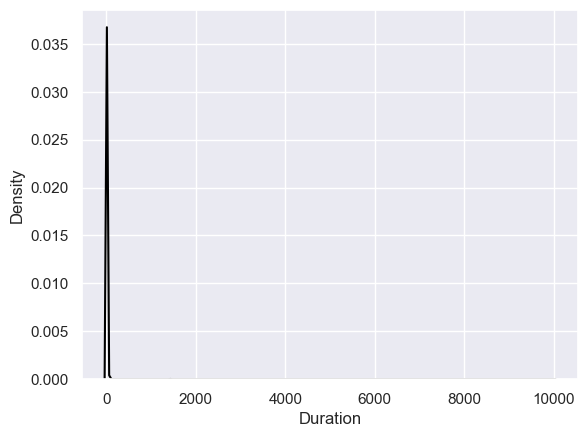

In [17]:
#let's drop the outliers
sns.kdeplot(df["Duration"], color = "black")


In [18]:
# We remove those records that are not between 1 and 60 minutes
df_no_outliers = df[(df["Duration"] >= 1) & (df["Duration"] <= 60)]
df_no_outliers

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [19]:
#Let's check the proportion of records
proportion = (df_no_outliers.shape[0]*100)/df.shape[0]
print("The proportion of reamining records is {}".format(proportion))

The proportion of reamining records is 98.1220282212598


#### One-hot encoding

In [20]:
#We'll apply one-hot encoding to the pickup and dropoff locations
#First we filter the dataset to only use the pickup and dropoff locations as features and also turn them into strings
features = ["PULocationID","DOLocationID"]
df_target = df_no_outliers.copy()
df_no_outliers = df_no_outliers[features].astype(str)
df_no_outliers


,PULocationID,DOLocationID
0,161,141
1,43,237
2,48,238
3,138,7
4,107,79
...,...,...
3066761,107,48
3066762,112,75
3066763,114,239
3066764,230,79


In [21]:
#Lets check the type of the features
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3009173 entries, 0 to 3066765
Data columns (total 2 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   PULocationID  object
 1   DOLocationID  object
dtypes: object(2)
memory usage: 68.9+ MB


In [22]:
#Let's create the dictionaries
train_dicts = df_no_outliers.to_dict(orient="records")
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
#We need to create the matrix
X_train.shape

(3009173, 515)

#### Training the model using a Linear Regression with default hyperparameters

In [23]:

target = "Duration"
y_train = df_target[target]
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
error = np.sqrt(mean_squared_error(y_train, y_pred))
print("The RMSE of the model in training is: {}".format(error))

The RMSE of the model in training is: 7.6492619382463465


### Preparing Validation Data

In [24]:
def val_data(url):
    df_val = pd.read_parquet(url)
    df_val["Duration"] = df_val["tpep_dropoff_datetime"] - df_val["tpep_pickup_datetime"]
    df_val["Duration"] = df_val["Duration"].apply(lambda t: t.total_seconds()/60)
    df_no_outliers_val = df_val[(df_val["Duration"] >= 1) & (df_val["Duration"] <= 60)]
    return df_no_outliers_val

In [25]:
df_validation = val_data(r"C:\Users\mokon\Documents\Mlops-Zoomcamp\Homework_1\yellow_tripdata_2023-02.parquet")
y_test = df_validation[target].values
X_test = dv.transform(df_validation[features].astype(str).to_dict(orient="records"))

In [26]:

y_pred_val = lr.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred_val))
print("The RMSE of the model in training is: {}".format(error))

The RMSE of the model in training is: 7.811818119227172
